<a href="https://colab.research.google.com/github/wangjb/MLprojs/blob/master/DigitalRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Acces to data folder in my google drive

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/kaggle/DigitalRecognizer")
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


'/content/gdrive/My Drive/kaggle/DigitalRecognizer'

#### Check filename of the datum

In [3]:
!ls

test.csv.zip  train.csv.zip


#### Read train and test data

In [0]:
from zipfile import ZipFile
import pandas as pd
import io

zf = ZipFile('train.csv.zip')
data = zf.read('train.csv')
traindf = pd.read_csv(io.BytesIO(data))

zf = ZipFile('test.csv.zip')
data = zf.read('test.csv')
testdf = pd.read_csv(io.BytesIO(data))

#### Split the train data into train set and validation set

Label of the case image is 2
(33600, 28, 28, 1)
(33600, 10)


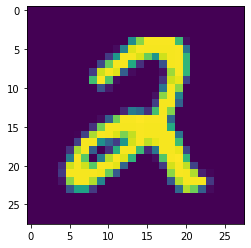

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

train_set, valid_set = train_test_split(traindf, test_size=0.2, random_state=42)

train_set_labels = train_set['label'].copy()
train_set = train_set.drop('label', axis=1)
train_set = train_set.values.reshape(train_set.shape[0],28,28)

valid_set_labels = valid_set['label'].copy()
valid_set = valid_set.drop('label', axis=1)
valid_set = valid_set.values.reshape(valid_set.shape[0],28,28)

caseimg = train_set[100]
caseimg_label = train_set_labels.iloc[100] 
print("Label of the case image is",caseimg_label)
plt.imshow(caseimg)

train_set = np.expand_dims(train_set, -1)
valid_set = np.expand_dims(valid_set, -1)
print(train_set.shape)
train_set_labels = tf.keras.utils.to_categorical(train_set_labels, 10)
valid_set_labels = tf.keras.utils.to_categorical(valid_set_labels, 10)
print(train_set_labels.shape)

Prepare and Explore the test data

(28000, 28, 28)


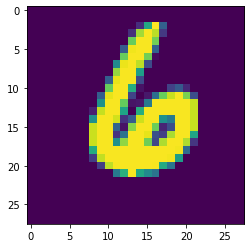

In [86]:
test_set = testdf.values.reshape(testdf.shape[0],28,28)
caseimg = test_set[50]
plt.imshow(caseimg)
print(test_set.shape)

#### Setup model environment

In [0]:
import tensorflow as tf

#### Setup model

In [87]:
BATCH_SIZE = 128
EPOCHS = 10

model = tf.keras.Sequential(
    [
     tf.keras.Input(shape=(28,28,1)),
     tf.keras.layers.Conv2D(kernel_size=3, filters=3, activation='relu', padding='same'),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(200, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 3)         30        
_________________________________________________________________
flatten_7 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               470600    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2010      
Total params: 472,640
Trainable params: 472,640
Non-trainable params: 0
_________________________________________________________________


#### Learning Rate Schedule

In [0]:
import math
def lr_decay(epoch):
  return 0.01 * math.pow(0.6, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

#### Train the model 

In [91]:
steps_per_epoch = train_set.shape[0]/BATCH_SIZE
print("Steps per epoch: ", steps_per_epoch)

model.fit(train_set, train_set_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1)

Steps per epoch:  262.5
Epoch 1/10
237/237 [==============================] - 9s 37ms/step - loss: 0.1137 - accuracy: 0.9668 - val_loss: 0.1856 - val_accuracy: 0.9533
Epoch 2/10
237/237 [==============================] - 9s 36ms/step - loss: 0.0680 - accuracy: 0.9789 - val_loss: 0.2173 - val_accuracy: 0.9494
Epoch 3/10
237/237 [==============================] - 9s 36ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.2366 - val_accuracy: 0.9512
Epoch 4/10
237/237 [==============================] - 9s 36ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.2759 - val_accuracy: 0.9467
Epoch 5/10
237/237 [==============================] - 9s 36ms/step - loss: 0.0576 - accuracy: 0.9832 - val_loss: 0.3442 - val_accuracy: 0.9354
Epoch 6/10
237/237 [==============================] - 9s 36ms/step - loss: 0.0856 - accuracy: 0.9773 - val_loss: 0.3593 - val_accuracy: 0.9381
Epoch 7/10
237/237 [==============================] - 9s 36ms/step - loss: 0.0875 - accuracy: 0.9755 - val_loss: 0.380

#### Evaluate the trained model

In [97]:
score = model.evaluate(valid_set, valid_set_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3436737060546875
Test accuracy: 0.9430952668190002
